In [74]:
## SCOTT ANDERSEN PANDAS HW

# Import libraries and dependencies

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [75]:
# Set file Paths to dataset using variables

whale_data = Path("/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/whale_returns.csv")
algo_data = Path("/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/algo_returns.csv")
sp500_data = Path("/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/sp500_history.csv")
whale_data

PosixPath('/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/whale_returns.csv')

In [76]:
# Read CSV data , set column index and datetime format

whale_returns = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv(algo_data,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500 = pd.read_csv(sp500_data,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [77]:
# Sort the index into ascending order

whale_returns.sort_index(inplace=True)
algo_returns.sort_index(inplace=True)
sp500.sort_index(inplace=True)

In [78]:
# Drop nulls

whale_returns.dropna(inplace=True)

In [79]:
# Check to see if they dropped

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [80]:
# Reading algorithmic returns
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [81]:
#Count Nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [82]:
# Drop Nulls 

algo_returns.dropna(inplace=True)

In [83]:
#Check to see if the nulls dropped 

algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [84]:
# Check the sp500 data types

sp500.dtypes

Close    object
dtype: object

In [85]:
# Fix Data Types

sp500['Close']= sp500.apply(lambda x:x['Close'].strip('$'), axis=1)

sp500['Close'] = sp500.apply(lambda x: float(x['Close']),axis=1)


In [86]:
# Drop Columns with (NaN)

sp500.dropna(inplace=True)

In [87]:
# Calculate the daily returns for the sp500 by using the "pct_change()"

daily_returns = sp500.pct_change(1)

In [88]:
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [89]:
# Drop nulls within the dataset
daily_returns.dropna()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [90]:
# Rename Column from Close to 'SP500'.

daily_returns.columns = ['SP500']

In [91]:
daily_returns.dropna()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [92]:
 # Concatenate all DataFrames into a single DataFrame and call it portfolio. 
    
portfolio = pd.concat([whale_returns, algo_returns, daily_returns], axis="columns", join="inner")

portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [93]:
portfolio.sort_index(inplace=True)

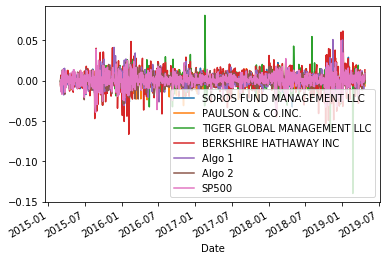

In [94]:
# Plot daily returns over a period of time. 

portfolio.plot()

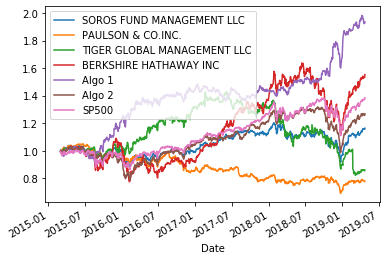

In [95]:
# Calculate the cumulative returns for the portfolio and plot the returns. 

cumulative_returns = (1 + portfolio).cumprod()
cumulative_returns.plot()

In [96]:
# Use a Box plot to show volatility risk between different investments in the portfolio. 

volatility = portfolio.std() * np.sqrt(252)

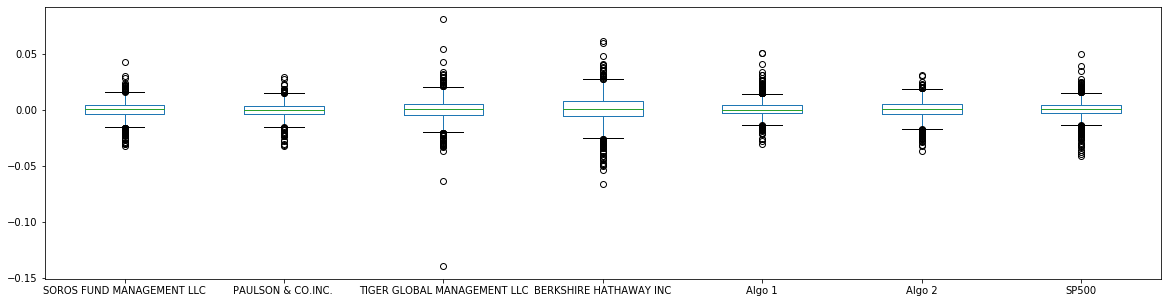

In [97]:
portfolio_risk = portfolio.plot(kind='box', figsize= (20,5))

In [98]:
# Daily Standard Deviations

portfolio_daily_std = portfolio.std()

# Calculate the standard deviation for each portfolio. 

portfolio_daily_std



SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

In [99]:
# Which portfolios are riskier than the S&P 500?

risky_portfolio = portfolio_daily_std.where(portfolio_daily_std < 0.008554, 'Risky')
risky_portfolio

#daily_std = np.random.normal(scale=0.5, size=10000)
#whale_std = np.random.normal(scale=1.0, size=10000)
#portfolio_std = np.random.normal(scale=2.0, size=10000)
#algo_std = np.random.normal(scale=1.5, size=10000)
#portfolio_std = pd.DataFrame({
#    "0.5": daily_std,
#    "1.0": whale_std,
#    "1.5": algo_std,
 #   "2.0": portfolio_std
    
#})

#portfolio_std.plot.hist(stacked=True, bins=100)

SOROS FUND MANAGEMENT LLC      0.00789537
PAULSON & CO.INC.              0.00702308
TIGER GLOBAL MANAGEMENT LLC         Risky
BERKSHIRE HATHAWAY INC              Risky
Algo 1                          0.0076202
Algo 2                         0.00834227
SP500                          0.00855373
dtype: object

In [100]:
# Annual Standard Deviation Variables for each investment.

sp500_vol = daily_returns.std() * np.sqrt(252)
whale_vol = whale_returns.std() * np.sqrt(252)
algo_vol = algo_returns.std() * np.sqrt(252)
portfolio_vol = portfolio.std() * np.sqrt(252)


sp500_std = sp500_vol.sort_values()
sp500_std
whale_std = whale_vol.sort_values()
whale_std
algo_std = algo_vol.sort_values()
algo_std
portfolio_std = portfolio_vol.sort_values()
portfolio_std


PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

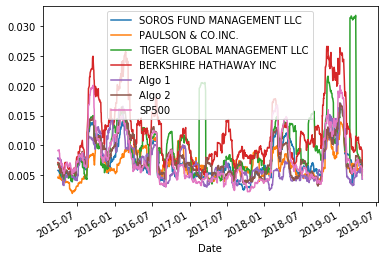

In [101]:
# Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). 

portfolio.rolling(window=21).std().plot() 

In [102]:
# Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?

correlation = portfolio.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


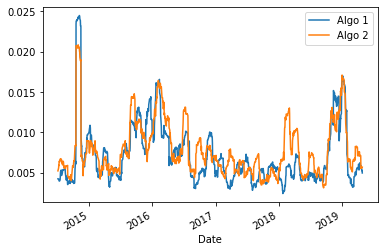

In [103]:
# Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns.  

algo_returns.rolling(window=21).std().plot()

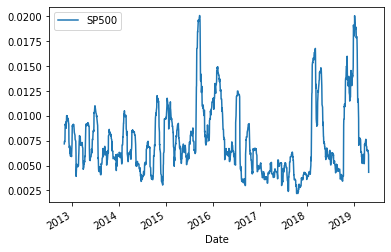

In [104]:
# Does the portfolio seem sensitive to movements in the S&P 500?
# The algo_returns do not look to be sensitive against the sp500's movements 

daily_returns.rolling(window=21).std().plot()

In [105]:
# Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance
# Annualized Sharpe Ratios

sharpe_ratios = (portfolio.mean() * 252) / (portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

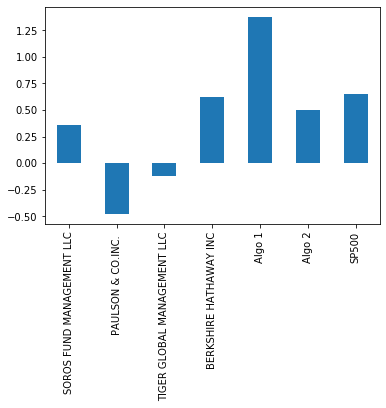

In [106]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

In [107]:
# CREATE YOUR OWN PORTFOLIIO

# Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
zoom_path = Path('/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/Zoom_data.csv')
american_path = Path('/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/AmericanAir.csv')
fis_path = Path('/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/FIS_data.csv')
nke_path = Path('/Users/scottandersen/FinTech_Git/NW_Folder/Northwestern/unit_3_pandas/pandas_hw/Nike_data.csv')


In [108]:
# Read in CSV Data for My Portfolio

nike_data = pd.read_csv(nke_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
fis_data = pd.read_csv(fis_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
american_data = pd.read_csv(american_path,index_col=[0] ,infer_datetime_format=True, parse_dates=True)
zoom_data = pd.read_csv(zoom_path,index_col=[0] ,infer_datetime_format=True, parse_dates=True)


In [109]:
# Sort the index column from the past to most recent.

zoom_data.sort_index(ascending=False)
zoom_data.isnull().sum()
zoom_data.dropna(inplace=True)

american_data.sort_index(ascending=False)
american_data.isnull().sum()
american_data.dropna(inplace=True)

nike_data.sort_index(ascending=False)
nike_data.isnull().sum()
nike_data.dropna(inplace=True)

fis_data.sort_index(ascending=False)
fis_data.isnull().sum()
fis_data.dropna(inplace=True)

In [110]:
nike_data.rename(columns = {'Close': 'NKE'}, inplace = True)
fis_data.rename(columns = {'Close':'FIS'}, inplace = True)
american_data.rename(columns = {'Unnamed: 1': 'AAL'}, inplace = True)
zoom_data.rename(columns = {'Unnamed: 1': 'ZM'}, inplace = True)
zoom_data.rename(index = {"Trade Date": "Date"}, inplace=True)

In [111]:
american_data

# Fix the Data - Object to Float

#fis = fis_data.apply(lambda x:x['FIS'].strip('$'), axis=1)
#fis = fis_data.apply(lambda x: float(x['FIS']),axis=1)
#fis_data.sort_index(ascending=False)


,AAL
Date,
2019-01-02,$32.48
2019-01-03,$30.06
2019-01-04,$32.04
2019-01-07,$32.95
2019-01-08,$32.42
...,...
2020-05-04,$9.82
2020-05-05,$9.51
2020-05-06,$9.25


In [112]:
# Combine 4 stock files into My_Portfolio

my_portfolio = pd.concat([nike_data, fis_data, american_data, zoom_data],axis="columns", join="inner")
my_portfolio.sort_index(inplace=True)

my_portfolio


,NKE,FIS,AAL,ZM
Date,,,,
2019-04-18,$89.20,$110.89,$34.37,$62.00
2019-04-22,$87.36,$112.21,$33.48,$65.70
2019-04-23,$87.43,$112.80,$33.97,$69.00
2019-04-24,$88.39,$112.04,$33.99,$63.20
2019-04-25,$87.56,$111.55,$33.41,$65.00
...,...,...,...,...
2020-05-04,$85.75,$128.58,$9.82,$143.44
2020-05-05,$87.20,$131.95,$9.51,$144.82
2020-05-06,$88.44,$131.91,$9.25,$149.59


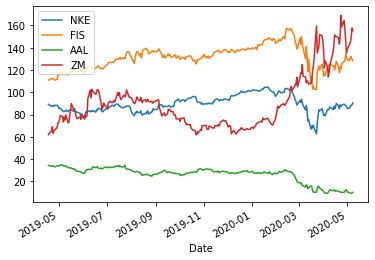

In [113]:
# Set the columns to numeric values to plot the data to make sure it is reading the files above

cols = "NKE FIS AAL ZM".split()
my_portfolio[cols]=my_portfolio[cols].replace({'\$':''},regex=True)

my_portfolio = my_portfolio.astype(float)

my_portfolio.plot()
#my_portfolio = my_portfolio.apply(lambda x:x.strip('$'), axis=1)
#my_portfolio = my_portfolio.apply(lambda x: float(x),axis=1)

In [114]:
daily_returns_2 = my_portfolio.pct_change()
daily_returns_2.dropna()

,NKE,FIS,AAL,ZM
Date,,,,
2019-04-22,-0.020628,0.011904,-0.025895,0.059677
2019-04-23,0.000801,0.005258,0.014636,0.050228
2019-04-24,0.010980,-0.006738,0.000589,-0.084058
2019-04-25,-0.009390,-0.004373,-0.017064,0.028481
2019-04-26,0.008566,-0.005827,-0.010476,0.018769
...,...,...,...,...
2020-05-04,0.002455,-0.005492,-0.077068,0.035219
2020-05-05,0.016910,0.026209,-0.031568,0.009621
2020-05-06,0.014220,-0.000303,-0.027340,0.032937


In [115]:
# Calculate the weighed returns

weights = [1/4,1/4, 1/4, 1/4]

my_portfolio_returns = daily_returns_2.dot(weights)
my_portfolio_returns.dropna()

#daily_std = np.random.normal(scale=0.5, size=10000)
#whale_std = np.random.normal(scale=1.0, size=10000)
#portfolio_std = np.random.normal(scale=2.0, size=10000)
#algo_std = np.random.normal(scale=1.5, size=10000)
#portfolio_std = pd.DataFrame({
#    "0.5": daily_std,
#    "1.0": whale_std,
#    "1.5": algo_std,
 #   "2.0": portfolio_std
    
#})

Date
2019-04-22    0.006265
2019-04-23    0.017731
2019-04-24   -0.019807
2019-04-25   -0.000587
2019-04-26    0.002758
                ...   
2020-05-04   -0.011221
2020-05-05    0.005293
2020-05-06    0.004879
2020-05-07    0.017217
2020-05-08    0.014948
Length: 266, dtype: float64

In [116]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

all_data = pd.concat([my_portfolio, portfolio], axis="columns", join="inner")

# Only compare dates where return data exists for all the stocks (drop NaNs)
all_data.sort_index(inplace=True) 
all_data.dropna()

,NKE,FIS,AAL,ZM,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,,,,
2019-04-18,89.20,110.89,34.37,62.0,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,87.36,112.21,33.48,65.7,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,87.43,112.80,33.97,69.0,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [117]:
# Risk
total_volatility = all_data.std() * np.sqrt(252)
total_volatility

NKE                            16.552426
FIS                            15.524857
AAL                             7.076185
ZM                             55.591006
SOROS FUND MANAGEMENT LLC       0.077797
PAULSON & CO.INC.               0.090571
TIGER GLOBAL MANAGEMENT LLC     0.080625
BERKSHIRE HATHAWAY INC          0.120282
Algo 1                          0.046242
Algo 2                          0.102840
SP500                           0.069303
dtype: float64

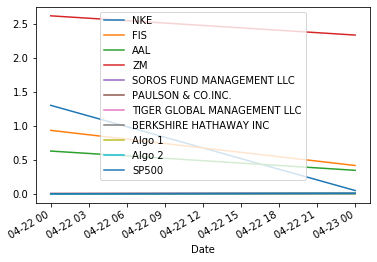

In [118]:
# Rolling

total_daily_returns = all_data.pct_change()
total_daily_returns.dropna(inplace=True)


all_data.rolling(window=2).std().plot() 

In [119]:
# Beta
#covariance = daily_returns[['my_portfolio'].cov(total_daily_returns['all_data'])
#covariance = total_daily_returns['all_data'].cov(daily_returns_2['my_portfollio'])
#variance = total_daily_returns['all_data'].var()                          

#total_daily_returns['all_data'].var()

#all_beta = covariance / variance
#all_beta

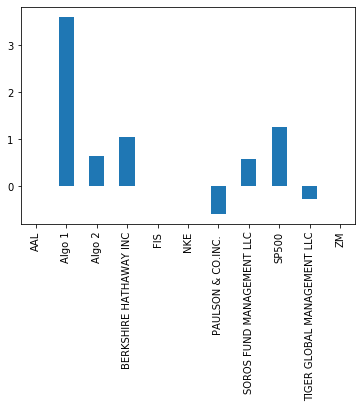

In [120]:
# Annualized Sharpe Ratios
# Visualize the sharpe ratios as a bar plot


sharpe_ratios = (portfolio.mean() * 252) / (all_data.std() * np.sqrt(252))
sharpe_ratios.plot(kind='bar')

In [121]:
correlation = all_data.corr()

In [128]:
correlation.head()

,NKE,FIS,AAL,ZM,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
NKE,1.000000,-0.942758,0.853389,-0.865729,-0.065844,0.349978,-0.061363,-0.286417,-0.650930,-0.421836,-0.412356
FIS,-0.942758,1.000000,-0.630707,0.983083,0.394828,-0.017557,0.390699,0.589528,0.866824,0.700044,0.692558
AAL,0.853389,-0.630707,1.000000,-0.477898,0.463953,0.786975,0.467926,0.255010,-0.159777,0.112635,0.122992
ZM,-0.865729,0.983083,-0.477898,1.000000,0.556431,0.165874,0.552694,0.727504,0.943488,0.818997,0.812968
SOROS FUND MANAGEMENT LLC,-0.065844,0.394828,0.463953,0.556431,1.000000,0.911681,0.999990,0.974885,0.800350,0.932480,0.936197
